In [1]:
import pandas as pd
from itertools import islice
import seaborn as sns
import matplotlib

In [2]:
url = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2021-06.csv.gz"
#url_pr = "processed_data_nextbike_2020-06cc.csv"
df = pd.read_csv(url, sep=';', low_memory=False)
#df_pr = pd.read_csv(url, sep=';', low_memory=False)

In [3]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [4]:
pd.set_option('display.max_columns()', None)

#### Function for limiting possible lengths of distances to 2500meters in order to work with one part of data without extreme values

In [5]:
def drop_duplicates(l):
    '''Droping duplicates from a list while maintaining order'''
    seen = set()
    seen_add = seen.add
    return [x for x in l if not (x in seen or seen_add(x))]

In [6]:
def short_list(time):
    return [x for x in sr[time] if x < 2500]

In [7]:
df = df.drop(['bike', 'bike_racks', 'bikes', 'booked_bikes', 'free_racks', 'free_special_racks', 'maintenance', 'number', 
              'place_type', 'rack_locks', 'special_racks', 'spot', 'terminal_type', 'city',
              'country_code', 'company', 'timezone'], axis=1)

df.drop(['index'], axis=1, inplace=True)

In [8]:
df.head()

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
0,50.983644,6.939938,50.966698,6.952133,2021-06-01 21:12:01,2021-06-01 21:23:01,11.0,2069.0,45940212,46048242,1272.0,NaN,BIKE 220486,1364
1,50.966698,6.952133,50.954489,6.957140,2021-06-01 21:51:01,2021-06-01 22:02:02,11.0,1403.0,46048242,46050688,28.0,NaN,BIKE 220486,1333
2,50.954489,6.957140,50.967271,6.949656,2021-06-01 23:32:01,2021-06-01 23:40:01,8.0,1515.0,46050688,46055615,90.0,NaN,BIKE 220486,1333
3,50.967271,6.949656,50.965391,6.953331,2021-06-02 07:44:02,2021-06-02 07:47:01,3.0,332.0,46055615,46067226,484.0,NaN,BIKE 220486,1378
4,50.965391,6.953331,50.921453,6.968314,2021-06-02 08:16:02,2021-06-02 08:46:02,30.0,4999.0,46067226,46070821,29.0,NaN,BIKE 220486,1359


In [9]:
negative_values = df[df['ride_time'] < 0].index.to_list()
negative_values

[]

In [10]:
#use only if there are values that you need to drop in negative values
#df.drop(negative_values, inplace=True)

In [11]:
out_rides = []
for index, row in df.iterrows():
    if (row['ride_time'] < 2) or (row['ride_time'] >= 700):
        out_rides.append(index)

In [12]:
out_distances_total = []
for index, row in df.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances_total.append(index)

In [13]:
len(df)

163191

In [14]:
len(out_distances_total)

32691

In [15]:
len(out_rides)

26933

In [16]:
out_set = len(set(out_rides + out_distances_total))
out_set

38241

In [17]:
# Function to callculate the intersection of two lists
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [18]:
intersect = intersection(out_rides, out_distances_total)
len(intersect)

21383

In [19]:
df_limit = df.drop(out_rides, axis=0)

In [20]:
df_limit['distance'].value_counts()

6.0        290
11.0       276
10.0       268
9.0        267
8.0        264
7.0        252
13.0       238
5.0        230
4.0        222
12.0       211
14.0       211
18.0       201
3.0        183
15.0       182
17.0       175
16.0       168
21.0       147
22.0       141
19.0       140
24.0       136
20.0       126
23.0       123
25.0       117
2.0        109
27.0       104
30.0        93
28.0        91
26.0        90
31.0        89
34.0        87
          ... 
8734.0       1
6380.0       1
7467.0       1
5417.0       1
6548.0       1
6260.0       1
8923.0       1
6821.0       1
5429.0       1
8270.0       1
5690.0       1
6381.0       1
6953.0       1
6840.0       1
7503.0       1
5090.0       1
8952.0       1
5314.0       1
5342.0       1
7709.0       1
6264.0       1
7493.0       1
7491.0       1
7708.0       1
6130.0       1
5688.0       1
7487.0       1
10544.0      1
6547.0       1
8784.0       1
Name: distance, Length: 6815, dtype: int64

In [21]:
out_distances = []
for index, row in df_limit.iterrows():
    if (row['distance'] < 200) or (row['distance'] >= 15200):
        out_distances.append(index)

In [22]:
len(out_distances)

11308

In [23]:
len(out_distances + out_rides)

38241

In [24]:
quotient = len(out_distances + out_rides) / len(df)
percent = quotient * 100
print(percent)

23.43327757045425


In [25]:
df_c = df_limit.drop(out_distances, axis=0)
df_c.reset_index(inplace=True)

In [26]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124950 entries, 0 to 124949
Data columns (total 15 columns):
index                   124950 non-null int64
lat_begin               124950 non-null float64
lng_begin               124950 non-null float64
lat_end                 124950 non-null float64
lng_end                 124950 non-null float64
ride_begin              124950 non-null object
ride_end                124950 non-null object
ride_time               124950 non-null float64
distance                124950 non-null float64
uid_begin               124950 non-null int64
uid_end                 124950 non-null int64
standing_before_ride    124950 non-null float64
address                 188 non-null object
name                    124950 non-null object
available_bikes         124950 non-null int64
dtypes: float64(7), int64(4), object(4)
memory usage: 14.3+ MB


In [27]:
df_c['distance'].value_counts()

496.0      80
493.0      79
499.0      78
423.0      77
697.0      77
548.0      77
642.0      77
579.0      75
457.0      75
501.0      75
700.0      74
456.0      74
448.0      73
490.0      73
786.0      73
516.0      73
681.0      72
704.0      72
677.0      72
478.0      72
331.0      72
549.0      72
442.0      71
724.0      71
482.0      71
421.0      71
459.0      70
665.0      70
961.0      70
672.0      70
           ..
7367.0      1
4849.0      1
7649.0      1
6212.0      1
6044.0      1
7829.0      1
7723.0      1
10641.0     1
8342.0      1
5315.0      1
5267.0      1
5790.0      1
7988.0      1
4791.0      1
6753.0      1
5508.0      1
6767.0      1
8752.0      1
9142.0      1
6190.0      1
7722.0      1
6125.0      1
5937.0      1
6272.0      1
7289.0      1
5213.0      1
5581.0      1
6363.0      1
6964.0      1
12437.0     1
Name: distance, Length: 6597, dtype: int64

In [28]:
df_c['ride_time'].value_counts()

5.0      7840
6.0      7786
7.0      7546
8.0      7181
9.0      6723
4.0      6654
10.0     6268
11.0     5907
12.0     5437
13.0     5160
14.0     4938
15.0     4418
16.0     4113
17.0     3857
18.0     3481
3.0      3266
19.0     3161
20.0     2908
21.0     2529
22.0     2337
23.0     2140
24.0     1894
25.0     1670
26.0     1533
27.0     1243
28.0     1235
29.0     1060
30.0      912
31.0      723
32.0      626
         ... 
609.0       1
697.0       1
580.0       1
636.0       1
694.0       1
478.0       1
542.0       1
587.0       1
497.0       1
682.0       1
592.0       1
600.0       1
538.0       1
474.0       1
586.0       1
584.0       1
614.0       1
594.0       1
619.0       1
655.0       1
362.0       1
504.0       1
673.0       1
495.0       1
653.0       1
617.0       1
524.0       1
489.0       1
671.0       1
630.0       1
Name: ride_time, Length: 664, dtype: int64

In [29]:
ind = []
for index, row in df_c.iterrows():
    if row['distance']<300:
        ind.append(index)

In [30]:
ind

[12,
 72,
 83,
 110,
 115,
 155,
 158,
 161,
 203,
 204,
 214,
 228,
 259,
 265,
 282,
 365,
 372,
 475,
 490,
 491,
 516,
 535,
 544,
 588,
 671,
 711,
 749,
 798,
 807,
 821,
 824,
 825,
 893,
 938,
 956,
 1035,
 1050,
 1165,
 1185,
 1253,
 1301,
 1327,
 1330,
 1386,
 1418,
 1449,
 1450,
 1531,
 1547,
 1576,
 1598,
 1634,
 1654,
 1684,
 1723,
 1741,
 1822,
 1852,
 1864,
 1885,
 1910,
 1948,
 1949,
 1961,
 1996,
 2023,
 2038,
 2047,
 2073,
 2114,
 2267,
 2306,
 2360,
 2363,
 2401,
 2462,
 2479,
 2482,
 2503,
 2539,
 2600,
 2615,
 2621,
 2627,
 2707,
 2738,
 2747,
 2798,
 2816,
 2855,
 2868,
 2900,
 2933,
 2981,
 3007,
 3015,
 3032,
 3048,
 3066,
 3069,
 3126,
 3164,
 3187,
 3238,
 3242,
 3251,
 3252,
 3338,
 3345,
 3404,
 3443,
 3458,
 3459,
 3460,
 3463,
 3522,
 3579,
 3641,
 3647,
 3677,
 3711,
 3776,
 3841,
 3940,
 3943,
 3979,
 3986,
 4002,
 4007,
 4046,
 4054,
 4055,
 4084,
 4124,
 4125,
 4130,
 4138,
 4173,
 4194,
 4213,
 4326,
 4336,
 4339,
 4370,
 4396,
 4402,
 4404,
 4430,
 4

In [31]:
df_c.iloc[ind]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
12,13,50.954031,6.950825,50.955796,6.949763,2021-06-02 22:44:02,2021-06-02 22:47:02,3.0,210.0,46139142,46139475,2.0,NaN,BIKE 220486,1323
72,90,50.950453,6.910477,50.951978,6.907978,2021-06-19 17:41:02,2021-06-19 17:45:02,4.0,244.0,47540114,47550572,121.0,NaN,BIKE 220486,1533
83,104,50.941493,6.908735,50.938973,6.909949,2021-06-23 18:23:01,2021-06-23 18:26:01,3.0,293.0,47873384,47876195,23.0,NaN,BIKE 220486,1664
110,134,50.915991,6.927088,50.913618,6.925172,2021-06-29 10:45:03,2021-06-29 10:49:02,4.0,296.0,48358379,48359277,13.0,NaN,BIKE 222136,1766
115,139,50.915227,6.940977,50.913093,6.942005,2021-06-29 19:03:01,2021-06-29 19:08:02,5.0,248.0,48400425,48404135,27.0,NaN,BIKE 222136,1754
155,197,50.918707,6.969877,50.916698,6.970329,2021-06-11 19:13:02,2021-06-11 19:16:02,3.0,226.0,46856387,46870685,128.0,NaN,BIKE 220022,1276
158,200,50.931520,6.950214,50.932871,6.947301,2021-06-12 17:32:01,2021-06-12 17:35:01,3.0,254.0,46915617,46944846,445.0,NaN,BIKE 220022,1332
161,204,50.935440,6.932738,50.934027,6.934502,2021-06-13 02:35:01,2021-06-13 02:38:02,3.0,200.0,46976466,46976791,6.0,NaN,BIKE 220022,1330
203,260,50.908587,6.973013,50.907484,6.970497,2021-06-26 21:44:01,2021-06-26 21:48:02,4.0,215.0,48142232,48156221,133.0,NaN,BIKE 220022,1664
204,261,50.907484,6.970497,50.908236,6.973329,2021-06-26 21:59:01,2021-06-26 22:04:01,5.0,216.0,48156221,48157416,11.0,NaN,BIKE 220022,1702


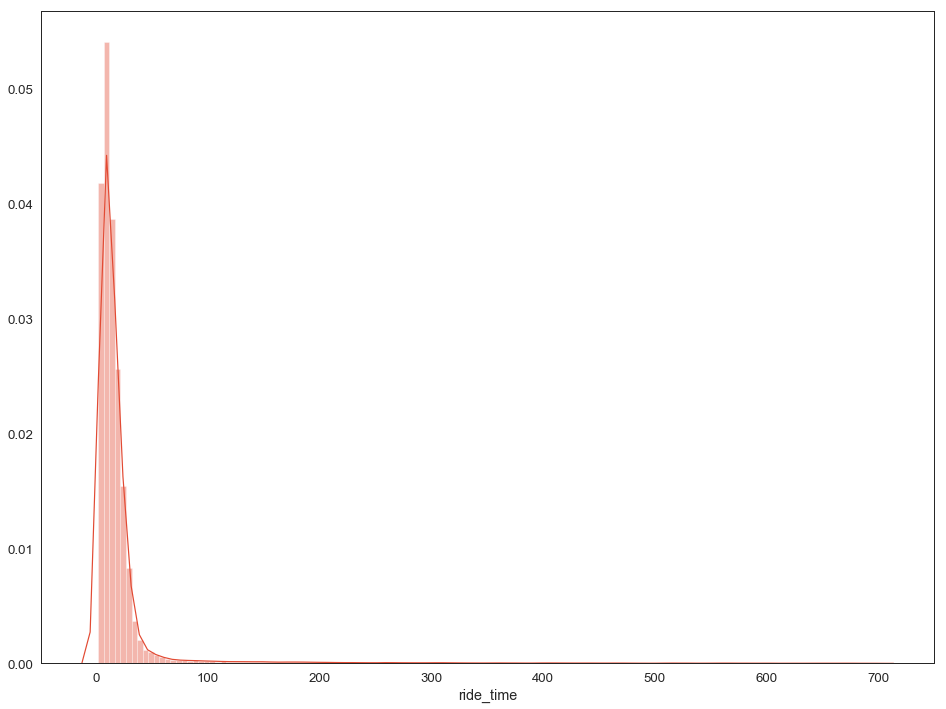

In [32]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['ride_time'], bins = 140)

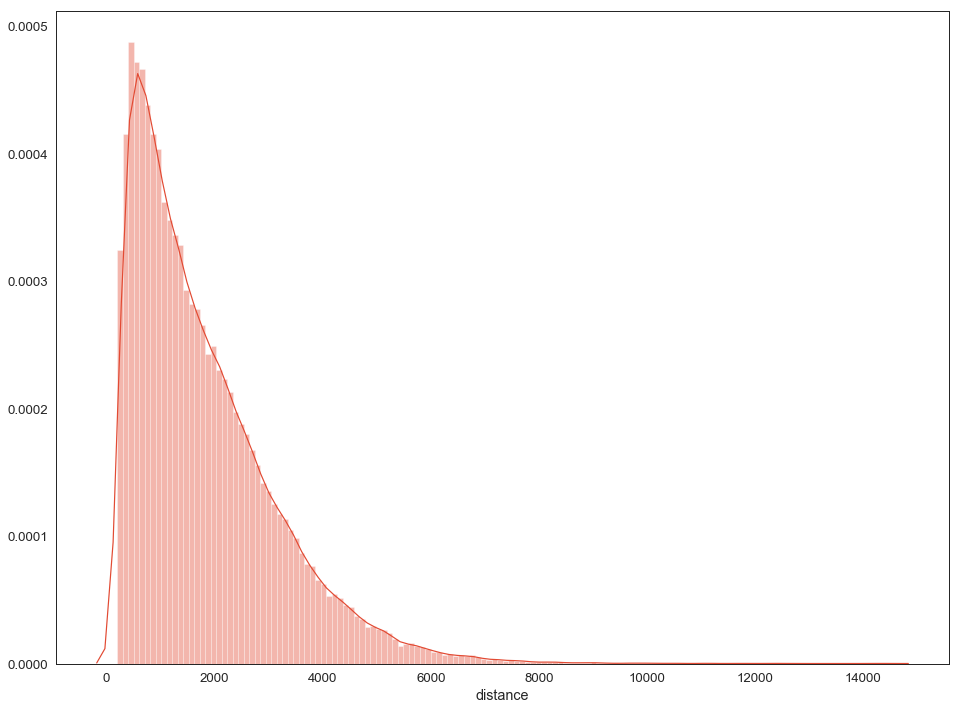

In [33]:
sns.set_style('white')
sns.set_context("paper", font_scale = 1.5)
sns.distplot(df_c['distance'], bins = 140)

In [34]:
rows_with_nan = []
for index, row in df_c.iterrows():
    is_nan_series = row.isnull()
    if is_nan_series.any():
        rows_with_nan.append(index)

In [35]:
df_adr = df_c.drop(rows_with_nan, axis=0)

In [36]:
df_adr

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
546,709,50.915529,6.927819,50.909071,6.927415,2021-06-16 01:01:02,2021-06-16 01:09:01,8.0,719.0,47207623,47217584,177.0,Gottesweg 1 50969 Köln,BIKE 220361,1489
734,950,50.982489,6.975328,50.967364,6.991850,2021-06-19 18:16:01,2021-06-19 18:46:01,30.0,2042.0,47524734,47556612,368.0,Am Mohlenkopf,BIKE 221081,1576
819,1060,50.958292,6.968603,50.946191,6.922343,2021-06-30 10:36:01,2021-06-30 10:58:02,22.0,3510.0,48445937,48448382,27.0,Innere Kanalstraße & Subbelrather Straße,BIKE 222552,1789
1066,1389,50.945347,6.932707,50.933351,6.934523,2021-06-27 22:10:01,2021-06-27 22:17:01,7.0,1340.0,48219229,48241834,257.0,Venloer Straße,BIKE 220891,1651
2217,2933,50.935849,6.934322,50.949862,6.954788,2021-06-03 13:32:01,2021-06-03 13:56:02,24.0,2118.0,46124484,46175665,1064.0,Brüsseler Straße 38,BIKE 221329,1273
2360,3120,50.946036,6.925747,50.948422,6.926648,2021-06-07 18:25:02,2021-06-07 18:31:02,6.0,273.0,46512163,46521606,84.0,Köln - Venloer Straße 184,BIKE 221369,1330
3781,4908,50.906631,6.977373,50.963853,6.956846,2021-06-23 21:14:02,2021-06-23 21:43:01,29.0,6525.0,47892323,47895084,7.0,Bayenthalgürtel,BIKE 220762,1686
3822,4961,50.934156,6.939434,50.942453,6.957762,2021-06-24 17:25:01,2021-06-24 17:37:02,12.0,1582.0,47947913,47959457,105.0,Hohenstaufen Ring 76,BIKE 221521,1729
4070,5304,50.927720,6.914323,50.925276,6.922857,2021-06-02 14:03:02,2021-06-02 14:27:02,24.0,657.0,46087827,46091902,27.0,Theresienstraße 52,BIKE 220793,1361
4775,6217,50.924316,6.919617,50.935311,6.950477,2021-06-24 17:41:01,2021-06-24 17:58:02,17.0,2485.0,47956539,47961712,32.0,uniklinik,BIKE 221458,1701


In [37]:
previous_index = 0
previous_distance = df_c.iloc[0]['distance']
suspicious_return_trips = []
for index,row in islice(df_c.iterrows(), 1, None):
    if (row['distance'] == previous_distance):
        suspicious_return_trips.append(previous_index)
        suspicious_return_trips.append(index)
        
    previous_index = index
    previous_distance = row['distance']

In [38]:
df_c.iloc[suspicious_return_trips]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes
94,118,50.968409,6.942638,50.983000,6.960568,2021-06-28 18:20:02,2021-06-28 18:34:01,14.0,2052.0,48274894,48309109,360.0,NaN,BIKE 220486,1714
95,119,50.983000,6.960568,50.968436,6.942575,2021-06-29 06:25:03,2021-06-29 06:36:01,11.0,2052.0,48309109,48344531,711.0,NaN,BIKE 220486,1667
410,521,50.913107,6.917528,50.916640,6.926080,2021-06-20 13:31:01,2021-06-20 13:37:02,6.0,717.0,47611515,47614354,43.0,NaN,BIKE 220290,1587
411,522,50.916640,6.926080,50.912613,6.918102,2021-06-20 16:25:02,2021-06-20 17:04:02,39.0,717.0,47614354,47628825,168.0,NaN,BIKE 220290,1548
2805,3682,50.926596,6.940505,50.921240,6.959803,2021-06-17 11:37:02,2021-06-17 11:45:01,8.0,1478.0,47336549,47339544,47.0,NaN,BIKE 220675,1535
2806,3683,50.921240,6.959803,50.926458,6.940418,2021-06-17 12:04:01,2021-06-17 12:18:02,14.0,1478.0,47339544,47341738,19.0,NaN,BIKE 220675,1525
4554,5933,50.929289,6.995820,50.918271,6.978308,2021-06-11 20:20:01,2021-06-11 20:31:01,11.0,1735.0,46832165,46878850,481.0,NaN,BIKE 220342,1325
4555,5934,50.918271,6.978308,50.931827,6.990563,2021-06-11 21:09:01,2021-06-11 21:19:01,10.0,1735.0,46878850,46883336,38.0,NaN,BIKE 220342,1267
4790,6234,50.930916,6.982665,50.965044,6.953477,2021-06-30 15:08:01,2021-06-30 15:46:02,38.0,4312.0,48460851,48468398,64.0,NaN,BIKE 221458,1754
4791,6235,50.965044,6.953477,50.930916,6.982665,2021-06-30 16:27:01,2021-06-30 17:01:02,34.0,4312.0,48468398,48475106,41.0,NaN,BIKE 221458,1752


In [39]:
def cal_distance_in_meters(speed, time):
    return (speed * round((time/60),1))*1000;

In [40]:
def cal_dis(speed, time):
    print(" Time(hr) :", time) ;
    print(" Speed(km / hr) :", speed);
    return speed * time;

print(" The calculated Distance(km) :",
                   cal_dis(20, 0.3));

 Time(hr) : 0.3
 Speed(km / hr) : 20
 The calculated Distance(km) : 6.0


In [41]:
calculated_distances = []
for row,col in df_c.iterrows():
    recorded_distance = df_c['distance'][row]
    duration = df_c['ride_time'][row]
    
    calculated_distance = cal_distance_in_meters(25, duration)
    calculated_distances.append(calculated_distance)

In [42]:
for d in range(len(calculated_distances)):
    calculated_distances[d] = round(calculated_distances[d] + 1500, 1)

In [43]:
df_c['calculated_distance'] = calculated_distances

In [44]:
unmatched_distances = []
for index, row in df_c.iterrows():
    if df_c['distance'][index] > df_c['calculated_distance'][index]:
        unmatched_distances.append(index)

In [45]:
df_c.iloc[unmatched_distances]

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,calculated_distance
15565,20301,50.979938,6.948198,50.944029,6.929708,2021-06-09 15:22:01,2021-06-09 15:26:02,4.0,4199.0,46670792,46672102,12.0,NaN,BIKE 221062,1319,4000.0
25621,33455,50.968644,6.874695,50.940462,6.940315,2021-06-20 14:26:02,2021-06-20 14:31:01,5.0,5565.0,47616702,47617733,11.0,NaN,BIKE 220019,1535,4000.0
32040,41758,50.948293,6.992782,50.952587,6.968296,2021-06-15 19:43:02,2021-06-15 19:45:02,2.0,1781.0,47192317,47194374,18.0,NaN,BIKE 220956,1395,1500.0
32455,42296,50.947111,6.885761,50.950667,6.907399,2021-06-15 14:30:03,2021-06-15 14:33:02,3.0,1567.0,47157501,47161534,50.0,NaN,BIKE 221319,1451,1500.0
36941,48123,50.907658,6.964129,50.915236,6.927344,2021-06-21 17:57:01,2021-06-21 18:00:03,3.0,2714.0,47703917,47711212,78.0,NaN,BIKE 222516,1588,1500.0
49181,64142,50.922098,6.951728,50.934858,6.960618,2021-06-12 22:24:01,2021-06-12 22:26:02,2.0,1550.0,46965449,46965878,6.0,NaN,BIKE 220206,1298,1500.0
50890,66404,50.940191,7.030057,50.950351,6.957751,2021-06-13 11:22:01,2021-06-13 11:25:02,3.0,5192.0,46547532,44955779,7822.0,NaN,BIKE 221239,1368,1500.0
51968,67783,50.958067,6.901076,50.938437,6.956294,2021-06-30 18:14:02,2021-06-30 18:16:02,2.0,4443.0,48416235,48482709,1255.0,NaN,BIKE 221531,1757,1500.0
53707,70015,50.939747,6.973556,50.921991,7.025673,2021-06-29 17:24:01,2021-06-29 17:30:02,6.0,4153.0,48349409,48391230,555.0,NaN,BIKE 222315,1721,4000.0
57632,75142,50.936116,6.963712,50.921396,6.959326,2021-06-05 05:28:02,2021-06-05 05:30:03,2.0,1666.0,46320795,46321066,11.0,NaN,BIKE 220002,1389,1500.0


In [46]:
len(unmatched_distances)

20

In [47]:
for i in unmatched_distances:
    if i in df_c.index.values:
        df_c.drop(i, inplace=True)

In [48]:
df_c.reset_index(inplace=True)

In [49]:
df_c['address'].value_counts(dropna=False)

NaN                                     124742
Uferstraße 39                                2
Herthastraße 68, 50969 Köln                  1
Köln - Merheimer Straße                      1
Innere Kanalstraße & Neusser Straße          1
herbigstraße                                 1
Mozartstraße 66                              1
Kennedyplatz  2, 50679 Köln                  1
Köln - Venloerstraße                         1
Köln - Schillerstraße                        1
Köln - Germaniastraße 88                     1
Köln - Oskar-Jäger-Straße                    1
Bayenthalgürtel                              1
Luxemburgerstraße 124                        1
Bonner Wall, Bonner Straße                   1
Universitätsstr.  59                         1
Stadtwald                                    1
Körnerstraße 7                               1
recording_119809524                          1
recording_119514432                          1
Poller Wiesen                                1
Köln - Claudi

In [50]:
df_c.rename(columns={"index": "old_index"}, inplace=True)
df_c.drop(['level_0', 'address'], axis=1, inplace=True)

In [51]:
df_c.to_csv('/bigdata/jelicicna/output_datasets/anlysis_data_nextbike_2021-06.csv', sep=';', index=False) 

In [52]:
len(df_c)

124930